<a href="https://colab.research.google.com/github/FlaviaSantos1804/covid19-brasil/blob/master/Covid19_no_Brasil.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise da pandemia de Covid-19 no Brasil 
Após o 1º caso confirmado em 26/02/2020 no estado paulista, o país vem sofrendo com graves consequências tanto econômicas, quanto sociais. Hospitais e cemitérios vivem cenas aterrorizantes, muitas vidas foram perdidas. Resta saber quando o normal voltará depois de um longo período de isolamento social.




+ Este notebook tem como finalidade acompanhar a evolução da pandemia no país, explorando datasets fornecidos pelo Ministério da Saúde regularmente, os quais são tratados por Raphael Fontes e disponibilizados na kaggle no seguinte endereço: https://www.kaggle.com/unanimad/corona-virus-brazil.
Esta análise não possui ligações com organizações, sendo apenas um pequeno projeto pessoal que permite implementar conhecimentos adquiridos tanto em python, quanto em data science.


## 1. Importando as bibliotecas 


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


##2. Utilizando o primeiro dataset
####A fim de que as datas estejam atualizadas, este dataset é modificado diariamente. No link da kaggle, seu nome original está como "brazil_covid19.csv". Neste notebook para fins didáticos, foi alterado para "covid19brasil.csv".
####O dataset não possui dados à respeito de cidades, apenas de regiões e estados brasileiros, contando com números de casos confirmados acumulados por data, como também de óbitos. 

### 2.1 Atribuindo o carregamento do dataset em csv à uma variável



In [2]:
# A variável se chama df_regioes_ufs.


df_regioes_ufs = pd.read_csv('covid19brasil.csv')
df_regioes_ufs

,date,region,state,cases,deaths
0,2020-02-25,Centro-Oeste,DF,0,0
1,2020-02-25,Centro-Oeste,GO,0,0
2,2020-02-25,Centro-Oeste,MS,0,0
3,2020-02-25,Centro-Oeste,MT,0,0
4,2020-02-25,Nordeste,AL,0,0
...,...,...,...,...,...
3262,2020-06-24,Sudeste,RJ,103493,9295
3263,2020-06-24,Sudeste,SP,238822,13352
3264,2020-06-24,Sul,PR,16963,521
3265,2020-06-24,Sul,RS,22009,500


### 2.2 Explorando o df_regioes_ufs

#### 2.2.1 Visualizando as 10 primeiras linhas

In [3]:
df_regioes_ufs.head(10)

,date,region,state,cases,deaths
0,2020-02-25,Centro-Oeste,DF,0,0
1,2020-02-25,Centro-Oeste,GO,0,0
2,2020-02-25,Centro-Oeste,MS,0,0
3,2020-02-25,Centro-Oeste,MT,0,0
4,2020-02-25,Nordeste,AL,0,0
5,2020-02-25,Nordeste,BA,0,0
6,2020-02-25,Nordeste,CE,0,0
7,2020-02-25,Nordeste,MA,0,0
8,2020-02-25,Nordeste,PB,0,0
9,2020-02-25,Nordeste,PE,0,0


#### 2.2.2 Alterando os nomes das colunas

In [4]:
alteracoes = {

'date':'data',
'region':'regiao',
'state':'uf',
'cases':'casos',
'deaths':'obitos'
    
}

In [5]:
df_regioes_ufs.rename(columns=alteracoes,inplace=True)

In [6]:
# Visualizando 3 linhas aleatórias.


df_regioes_ufs.sample(3)  

,data,regiao,uf,casos,obitos
2400,2020-05-23,Sul,PR,3099,150
676,2020-03-21,Centro-Oeste,GO,20,0
315,2020-03-07,Norte,RR,0,0


#### 2.2.3 Modificando o formato da coluna data

In [7]:
# O formato da coluna data está como objeto, ou seja, string. 


df_regioes_ufs.dtypes

data      object
regiao    object
uf        object
casos      int64
obitos     int64
dtype: object

In [8]:
# Agora, o formato da coluna data será datetime.


from datetime import datetime 
df_regioes_ufs['data']= pd.to_datetime(df_regioes_ufs['data'],format='%Y-%m-%d')



In [9]:
df_regioes_ufs

,data,regiao,uf,casos,obitos
0,2020-02-25,Centro-Oeste,DF,0,0
1,2020-02-25,Centro-Oeste,GO,0,0
2,2020-02-25,Centro-Oeste,MS,0,0
3,2020-02-25,Centro-Oeste,MT,0,0
4,2020-02-25,Nordeste,AL,0,0
...,...,...,...,...,...
3262,2020-06-24,Sudeste,RJ,103493,9295
3263,2020-06-24,Sudeste,SP,238822,13352
3264,2020-06-24,Sul,PR,16963,521
3265,2020-06-24,Sul,RS,22009,500


In [10]:
# Verificando o formato das colunas.


df_regioes_ufs.dtypes

data      datetime64[ns]
regiao            object
uf                object
casos              int64
obitos             int64
dtype: object

#### 2.2.4 Verificando o tamanho do df_regioes_ufs






In [11]:
linhas = df_regioes_ufs.shape[0]
colunas = df_regioes_ufs.shape[1]

print(f'O dataframe possui {linhas} linhas e {colunas} colunas')

O dataframe possui 3267 linhas e 5 colunas


#### 2.2.5 Conferindo a presença de valores nulos

In [12]:
verificando_nulos = df_regioes_ufs.isnull()
verificando_nulos

,data,regiao,uf,casos,obitos
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
3262,False,False,False,False,False
3263,False,False,False,False,False
3264,False,False,False,False,False
3265,False,False,False,False,False


In [13]:
lista=[]
for item in verificando_nulos.iterrows():
  for tf in item[-1]:
      if(tf==True):
        lista.append(tf) 
        df_regioes_ufs.dropna(inplace=True)             
print("Total de valores nulos removidos do df_regioes_ufs: {}".format(len(lista)))
print("O df_regioes_ufs possui {} linhas atualizadas".format(df_regioes_ufs.shape[0]))


Total de valores nulos removidos do df_regioes_ufs: 0
O df_regioes_ufs possui 3267 linhas atualizadas


#### 2.2.6 Examinando algumas medidas

In [14]:
# Todos as unidades federativas presentes. 


for uf in df_regioes_ufs['uf'].unique():
  print(uf)

DF
GO
MS
MT
AL
BA
CE
MA
PB
PE
PI
RN
SE
AC
AM
AP
PA
RO
RR
TO
ES
MG
RJ
SP
PR
RS
SC


In [15]:
# Quantidade de vezes que cada uf aparece.


df_regioes_ufs['uf'].value_counts()

RS    121
ES    121
MT    121
SP    121
BA    121
AM    121
PR    121
RO    121
AL    121
SE    121
RN    121
MG    121
PA    121
GO    121
AP    121
PE    121
RR    121
PB    121
PI    121
RJ    121
SC    121
TO    121
DF    121
CE    121
AC    121
MA    121
MS    121
Name: uf, dtype: int64

#### 2.2.7 Removendo duplicatas do df_regioes_ufs

In [16]:
# Caso existam linhas duplicadas, elas serão removidas.


df_regioes_ufs.drop_duplicates(inplace=True)

In [17]:
df_regioes_ufs

,data,regiao,uf,casos,obitos
0,2020-02-25,Centro-Oeste,DF,0,0
1,2020-02-25,Centro-Oeste,GO,0,0
2,2020-02-25,Centro-Oeste,MS,0,0
3,2020-02-25,Centro-Oeste,MT,0,0
4,2020-02-25,Nordeste,AL,0,0
...,...,...,...,...,...
3262,2020-06-24,Sudeste,RJ,103493,9295
3263,2020-06-24,Sudeste,SP,238822,13352
3264,2020-06-24,Sul,PR,16963,521
3265,2020-06-24,Sul,RS,22009,500


### 2.3 Averiguando os casos confirmados e óbitos por unidade federativa





#### 2.3.1 Calculando os números de casos e óbitos de cada uf

In [18]:
df_regioes_ufs.head()

,data,regiao,uf,casos,obitos
0,2020-02-25,Centro-Oeste,DF,0,0
1,2020-02-25,Centro-Oeste,GO,0,0
2,2020-02-25,Centro-Oeste,MS,0,0
3,2020-02-25,Centro-Oeste,MT,0,0
4,2020-02-25,Nordeste,AL,0,0


In [19]:
''' Como os números tanto de casos confirmados, quanto de óbitos são acumulativos, 
deve-se calcular os totais usando a built-in-function max() em ambos. 
Nesta consulta, a qual foi atribuída à variável ufs_casos_obitos, as ufs foram agrupadas, 
e assim pôde-se obter os totais de infectados e de óbitos por estado.'''


ufs_casos_obitos = df_regioes_ufs.groupby('uf').max()[['casos','obitos']]
ufs_casos_obitos

,casos,obitos
uf,,
AC,12022,326
AL,31230,938
AM,66764,2710
AP,26919,387
BA,51931,1541
CE,99578,5815
DF,37254,495
ES,38481,1463
GO,18622,363


#### 2.3.2 Calculando as porcentagens de casos e óbitos de cada uf
Estes dados estão na forma de número decimal e representam x % do total de casos ou de óbitos no país, sendo x o dado.

In [20]:
# Somando o total de casos de cada uf, pode-se obter o total de casos no país.


total_casos = ufs_casos_obitos['casos'].sum()
print(f"O total de indivíduos infectados no Brasil é de {total_casos}.")

O total de indivíduos infectados no Brasil é de 1188631.


In [21]:
''' Através de uma iteração com o número de casos por uf, 
cada um é dividido pelo total de casos no país e multiplicado por 100,
sendo adicionados a uma lista chamada porcentagem_casos_ufs.'''


porcentagem_casos_ufs = []
for _ in ufs_casos_obitos['casos']:
    porcentagem_casos_ufs.append((_/total_casos)*100) 
print(porcentagem_casos_ufs)

[1.0114156538067745, 2.627392353051536, 5.616881942335342, 2.2647062040279953, 4.368975737634304, 8.377536847011394, 3.1341938751387097, 3.237421874408458, 1.5666762855755907, 6.167936054166516, 2.636899088110608, 0.5216926026664288, 0.9627041529288737, 7.715430608826457, 3.357812475023788, 4.544892401426515, 1.3651839805625126, 1.4271039540446109, 8.706907358128806, 1.831855302444577, 1.4658880678696753, 0.9088606977270491, 1.8516259461514968, 1.7600920723083953, 1.7123060058167758, 20.092190090953373, 0.7654183678534381]


In [22]:
''' A lista porcentagem_casos_ufs é então adicionada ao ufs_casos_obitos 
na coluna porcentagem_casos.'''
 

ufs_casos_obitos['porcentagem_casos']=porcentagem_casos_ufs
ufs_casos_obitos

,casos,obitos,porcentagem_casos
uf,,,
AC,12022,326,1.011416
AL,31230,938,2.627392
AM,66764,2710,5.616882
AP,26919,387,2.264706
BA,51931,1541,4.368976
CE,99578,5815,8.377537
DF,37254,495,3.134194
ES,38481,1463,3.237422
GO,18622,363,1.566676


In [23]:
# A coluna porcentagem_casos é arredondada para duas casas decimais.


ufs_casos_obitos['porcentagem_casos']=ufs_casos_obitos['porcentagem_casos'].round(2)
ufs_casos_obitos

,casos,obitos,porcentagem_casos
uf,,,
AC,12022,326,1.01
AL,31230,938,2.63
AM,66764,2710,5.62
AP,26919,387,2.26
BA,51931,1541,4.37
CE,99578,5815,8.38
DF,37254,495,3.13
ES,38481,1463,3.24
GO,18622,363,1.57


In [24]:
''' O ufs_casos_obitos é ordenado em ordem descrecente pela porcentagem_casos, e é
apresentado os três estados com as maiores porcentagens de contaminação comparadas ao
país como um todo.''' 


ufs_casos_obitos.sort_values('porcentagem_casos',inplace=True,ascending=False)
print("Top 3 dos casos confirmados:\n")
print("{} % dos infectados no país são de {}\n".format(ufs_casos_obitos.iloc[0][2],ufs_casos_obitos.iloc[0].name))
print("{} % dos infectados no país são de {}\n".format(ufs_casos_obitos.iloc[1][2],ufs_casos_obitos.iloc[1].name))
print("{} % dos infectados no país são de {}\n\n".format(ufs_casos_obitos.iloc[2][2],ufs_casos_obitos.iloc[2].name))
ufs_casos_obitos

Top 3 dos casos confirmados:

20.09 % dos infectados no país são de SP

8.71 % dos infectados no país são de RJ

8.38 % dos infectados no país são de CE




,casos,obitos,porcentagem_casos
uf,,,
SP,238822,13352,20.09
RJ,103493,9295,8.71
CE,99578,5815,8.38
PA,91708,4726,7.72
MA,73314,1836,6.17
AM,66764,2710,5.62
PE,54022,4425,4.54
BA,51931,1541,4.37
PB,39912,828,3.36


In [25]:
# Somando o total de óbitos de cada uf, pode-se obter o total de óbitos no país.


total_obitos = ufs_casos_obitos['obitos'].sum()
print(f"O total de óbitos no Brasil é de {total_obitos}.")

O total de óbitos no Brasil é de 53830.


In [26]:
''' A coluna porcentagem_obitos é adicionada ao ufs_casos_obitos, sendo a divisão de obitos
por total_obitos. Além disso, foi multiplicada por 100 e arredondada para duas casas decimais.'''


ufs_casos_obitos['porcentagem_obitos']=((ufs_casos_obitos['obitos']/total_obitos)*100).round(2)
ufs_casos_obitos

,casos,obitos,porcentagem_casos,porcentagem_obitos
uf,,,,
SP,238822,13352,20.09,24.80
RJ,103493,9295,8.71,17.27
CE,99578,5815,8.38,10.80
PA,91708,4726,7.72,8.78
MA,73314,1836,6.17,3.41
AM,66764,2710,5.62,5.03
PE,54022,4425,4.54,8.22
BA,51931,1541,4.37,2.86
PB,39912,828,3.36,1.54


In [27]:
''' A coluna porcentagem_obitos é iterada, adicionando cada valor à lista 
porcentagem_obitos_ufs, a qual é ordenada em ordem descrecente.'''


porcentagem_obitos_ufs=[]
for _ in ufs_casos_obitos['porcentagem_obitos']:
  porcentagem_obitos_ufs.append(_)
porcentagem_obitos_ufs = sorted(porcentagem_obitos_ufs,reverse=True)
porcentagem_obitos_ufs

[24.8,
 17.27,
 10.8,
 8.78,
 8.22,
 5.03,
 3.41,
 2.86,
 2.72,
 1.74,
 1.54,
 1.5,
 1.43,
 0.99,
 0.97,
 0.97,
 0.93,
 0.92,
 0.85,
 0.82,
 0.72,
 0.67,
 0.61,
 0.52,
 0.48,
 0.34,
 0.1]

In [28]:
''' O ufs_casos_obitos é ordenado em ordem descrecente pela porcentagem_casos, e é
apresentado os três estados com as maiores porcentagens de contaminação e de óbitos, comparados
ao país de modo geral.''' 


ufs_casos_obitos.sort_values('porcentagem_casos',inplace=True,ascending=False)
print("Top 3 dos casos confirmados:\n")
print("{} % dos infectados no país são de {}\n".format(ufs_casos_obitos.iloc[0][2],ufs_casos_obitos.iloc[0].name))
print("{} % dos infectados no país são de {}\n".format(ufs_casos_obitos.iloc[1][2],ufs_casos_obitos.iloc[1].name))
print("{} % dos infectados no país são de {}\n\n".format(ufs_casos_obitos.iloc[2][2],ufs_casos_obitos.iloc[2].name))

print("Top 3 dos óbitos:\n")
print("{} % dos óbitos no país são de {}\n".format(porcentagem_obitos_ufs[0],ufs_casos_obitos.loc[ufs_casos_obitos['porcentagem_obitos']==porcentagem_obitos_ufs[0]].index[0]))
print("{} % dos óbitos no país são de {}\n".format(porcentagem_obitos_ufs[1],ufs_casos_obitos.loc[ufs_casos_obitos['porcentagem_obitos']==porcentagem_obitos_ufs[1]].index[0]))
print("{} % dos óbitos no país são de {}\n".format(porcentagem_obitos_ufs[2],ufs_casos_obitos.loc[ufs_casos_obitos['porcentagem_obitos']==porcentagem_obitos_ufs[2]].index[0]))


ufs_casos_obitos

Top 3 dos casos confirmados:

20.09 % dos infectados no país são de SP

8.71 % dos infectados no país são de RJ

8.38 % dos infectados no país são de CE


Top 3 dos óbitos:

24.8 % dos óbitos no país são de SP

17.27 % dos óbitos no país são de RJ

10.8 % dos óbitos no país são de CE



,casos,obitos,porcentagem_casos,porcentagem_obitos
uf,,,,
SP,238822,13352,20.09,24.80
RJ,103493,9295,8.71,17.27
CE,99578,5815,8.38,10.80
PA,91708,4726,7.72,8.78
MA,73314,1836,6.17,3.41
AM,66764,2710,5.62,5.03
PE,54022,4425,4.54,8.22
BA,51931,1541,4.37,2.86
PB,39912,828,3.36,1.54


#### 2.3.3 Calculando a taxa de letalidade de cada uf
A taxa de letalidade adotada pelo Ministério da Saúde é a razão entre o número de óbitos e o número de casos confirmados, e será a mesma adotada neste projeto.


In [29]:
''' A taxa de letalidade de cada uf se encontra na coluna taxa_de_letalidade, e além de ter sido multiplicada por 100,
foi arredondada para duas casas decimais.'''


ufs_casos_obitos['taxa_de_letalidade'] = ((ufs_casos_obitos['obitos']/ufs_casos_obitos['casos'])*100).round(2)
ufs_casos_obitos

,casos,obitos,porcentagem_casos,porcentagem_obitos,taxa_de_letalidade
uf,,,,,
SP,238822,13352,20.09,24.80,5.59
RJ,103493,9295,8.71,17.27,8.98
CE,99578,5815,8.38,10.80,5.84
PA,91708,4726,7.72,8.78,5.15
MA,73314,1836,6.17,3.41,2.50
AM,66764,2710,5.62,5.03,4.06
PE,54022,4425,4.54,8.22,8.19
BA,51931,1541,4.37,2.86,2.97
PB,39912,828,3.36,1.54,2.07


In [30]:
''' A coluna taxa_de_letalidade é iterada e cada taxa é adicionada à lista taxa_de_letalidade_lista,
tendo seus itens ordenados em ordem descrecente.'''


taxa_de_letalidade_lista=[]
for _ in ufs_casos_obitos['taxa_de_letalidade']:
  taxa_de_letalidade_lista.append(_)
taxa_de_letalidade_lista = sorted(taxa_de_letalidade_lista,reverse=True)
print(taxa_de_letalidade_lista)

[8.98, 8.19, 5.84, 5.59, 5.15, 4.06, 3.87, 3.8, 3.71, 3.29, 3.07, 3.0, 2.97, 2.71, 2.61, 2.57, 2.5, 2.46, 2.4, 2.27, 2.07, 1.99, 1.95, 1.44, 1.33, 1.33, 0.9]


In [31]:
''' Agora, além de mostrar o DataFrame ufs_casos_obitos, as 3 ufs com maior número de casos confirmados, de óbitos,
ou de taxa de letalidade são apresentadas, juntamente com sua respectiva porcentagem.'''


print("Top 3 dos casos confirmados:\n")
print("{} % dos infectados no país são de {}\n".format(ufs_casos_obitos.iloc[0][2],ufs_casos_obitos.iloc[0].name))
print("{} % dos infectados no país são de {}\n".format(ufs_casos_obitos.iloc[1][2],ufs_casos_obitos.iloc[1].name))
print("{} % dos infectados no país são de {}\n\n".format(ufs_casos_obitos.iloc[2][2],ufs_casos_obitos.iloc[2].name))

print("Top 3 dos óbitos:\n")
print("{} % dos óbitos no país são de {}\n".format(porcentagem_obitos_ufs[0],ufs_casos_obitos.loc[ufs_casos_obitos['porcentagem_obitos']==porcentagem_obitos_ufs[0]].index[0]))
print("{} % dos óbitos no país são de {}\n".format(porcentagem_obitos_ufs[1],ufs_casos_obitos.loc[ufs_casos_obitos['porcentagem_obitos']==porcentagem_obitos_ufs[1]].index[0]))
print("{} % dos óbitos no país são de {}\n\n".format(porcentagem_obitos_ufs[2],ufs_casos_obitos.loc[ufs_casos_obitos['porcentagem_obitos']==porcentagem_obitos_ufs[2]].index[0]))


print("Top 3 das taxas de letalidade:\n")
print("{} % é a taxa de letalidade de {}\n".format(taxa_de_letalidade_lista[0],ufs_casos_obitos.loc[ufs_casos_obitos['taxa_de_letalidade']==taxa_de_letalidade_lista[0]].index[0]))
print("{} % é a taxa de letalidade de {}\n".format(taxa_de_letalidade_lista[1],ufs_casos_obitos.loc[ufs_casos_obitos['taxa_de_letalidade']==taxa_de_letalidade_lista[1]].index[0]))
print("{} % é a taxa de letalidade de {}\n\n".format(taxa_de_letalidade_lista[2],ufs_casos_obitos.loc[ufs_casos_obitos['taxa_de_letalidade']==taxa_de_letalidade_lista[2]].index[0]))



ufs_casos_obitos

Top 3 dos casos confirmados:

20.09 % dos infectados no país são de SP

8.71 % dos infectados no país são de RJ

8.38 % dos infectados no país são de CE


Top 3 dos óbitos:

24.8 % dos óbitos no país são de SP

17.27 % dos óbitos no país são de RJ

10.8 % dos óbitos no país são de CE


Top 3 das taxas de letalidade:

8.98 % é a taxa de letalidade de RJ

8.19 % é a taxa de letalidade de PE

5.84 % é a taxa de letalidade de CE




,casos,obitos,porcentagem_casos,porcentagem_obitos,taxa_de_letalidade
uf,,,,,
SP,238822,13352,20.09,24.80,5.59
RJ,103493,9295,8.71,17.27,8.98
CE,99578,5815,8.38,10.80,5.84
PA,91708,4726,7.72,8.78,5.15
MA,73314,1836,6.17,3.41,2.50
AM,66764,2710,5.62,5.03,4.06
PE,54022,4425,4.54,8.22,8.19
BA,51931,1541,4.37,2.86,2.97
PB,39912,828,3.36,1.54,2.07


#### 2.3.4 Criando a função dados_ufs
Ao passar a uf de interesse em seu parâmetro, a funçâo apresenta os dados do DataFrame ufs_casos_obitos correspondentes, como também a posição em que ocupa. Além disso, caso a uf esteja entre as três primeiras em número de casos confirmados, de óbitos ou de letalidade,
uma mensagem de alerta é mostrada para cada ocorrência.

In [32]:
''' A coluna obitos é iterada, sendo adicionado cada valor à lista 
numero_obitos, a qual é ordenada em ordem descrecente.'''


numero_obitos=[]
for _ in ufs_casos_obitos['obitos']:
  numero_obitos.append(_)
numero_obitos=sorted(numero_obitos,reverse=True)
numero_obitos

[13352,
 9295,
 5815,
 4726,
 4425,
 2710,
 1836,
 1541,
 1463,
 938,
 828,
 807,
 771,
 534,
 524,
 521,
 500,
 495,
 455,
 443,
 387,
 363,
 326,
 279,
 259,
 181,
 56]

In [33]:
# Um DataFrame é criado sendo a cópia do ufs_casos_obitos, mas com a coluna de índice diferente.


ufs_casos_obitos_com_indice = ufs_casos_obitos.reset_index()
ufs_casos_obitos_com_indice

,uf,casos,obitos,porcentagem_casos,porcentagem_obitos,taxa_de_letalidade
0,SP,238822,13352,20.09,24.80,5.59
1,RJ,103493,9295,8.71,17.27,8.98
2,CE,99578,5815,8.38,10.80,5.84
3,PA,91708,4726,7.72,8.78,5.15
4,MA,73314,1836,6.17,3.41,2.50
5,AM,66764,2710,5.62,5.03,4.06
6,PE,54022,4425,4.54,8.22,8.19
7,BA,51931,1541,4.37,2.86,2.97
8,PB,39912,828,3.36,1.54,2.07
9,ES,38481,1463,3.24,2.72,3.80


In [34]:
# Definindo a funçâo dados_ufs.


def dados_ufs(uf):
  if (ufs_casos_obitos['casos'][0]==ufs_casos_obitos.loc[uf][0]):
    print("\nCampeã em número de casos confirmados !!!\n\n")
  elif(ufs_casos_obitos['casos'][1]==ufs_casos_obitos.loc[uf][0]):
    print("\n2º maior número de casos confirmados !!!\n\n")
  elif(ufs_casos_obitos['casos'][2]==ufs_casos_obitos.loc[uf][0]):
    print("\n3º maior número de casos confirmados !!!\n\n")
  if (ufs_casos_obitos['obitos'].max()==ufs_casos_obitos.loc[uf][1]):
    print("\nCampeã em número de óbitos !!!\n\n")
  elif(numero_obitos[1]==ufs_casos_obitos.loc[uf][1]):
    print("\n2º maior número de óbitos !!!\n\n")
  elif(numero_obitos[2]==ufs_casos_obitos.loc[uf][1]):
    print("\n3º maior número de óbitos !!!\n\n")
  if (ufs_casos_obitos.loc[uf][-1]==taxa_de_letalidade_lista[0]):
    print("\nCampeã em taxa de letalidade !!!\n\n")
  elif(ufs_casos_obitos.loc[uf][-1]==taxa_de_letalidade_lista[1]):
    print("\n2ª maior taxa de letalidade !!!\n\n")
  elif(ufs_casos_obitos.loc[uf][-1]==taxa_de_letalidade_lista[2]):
    print("\n3ª maior taxa de letalidade !!!\n\n")

  
  
  print("\nPosição: {} - Casos confirmados: {}".format(str(ufs_casos_obitos_com_indice.loc[ufs_casos_obitos_com_indice['uf']==uf].index[0]+1)+ "º",ufs_casos_obitos.loc[uf][0]))
  print("Posição: {} - Óbitos: {}".format(str(numero_obitos.index(ufs_casos_obitos.loc[uf][1]) + 1) + "º",ufs_casos_obitos.loc[uf][1]))
  print("Posição: {} - Porcentagem de casos: {} %".format(str(ufs_casos_obitos_com_indice.loc[ufs_casos_obitos_com_indice['uf']==uf].index[0]+1) + "º",ufs_casos_obitos.loc[uf][2]))
  print("Posição: {} - Porcentagem de óbitos: {} %".format(str(porcentagem_obitos_ufs.index(ufs_casos_obitos.loc[uf][3]) + 1) + "º",ufs_casos_obitos.loc[uf][3]))
  print("Posição: {} - Taxa de letalidade: {} %".format(str(taxa_de_letalidade_lista.index(ufs_casos_obitos.loc[uf][-1]) + 1) + "º",ufs_casos_obitos.loc[uf][-1]))

In [35]:
# Testando com a uf RJ.


dados_ufs('RJ')


2º maior número de casos confirmados !!!



2º maior número de óbitos !!!



Campeã em taxa de letalidade !!!



Posição: 2º - Casos confirmados: 103493.0
Posição: 2º - Óbitos: 9295.0
Posição: 2º - Porcentagem de casos: 8.71 %
Posição: 2º - Porcentagem de óbitos: 17.27 %
Posição: 1º - Taxa de letalidade: 8.98 %


### 2.4 Plotando gráficos do país e de unidades federativas



Eles apresentam a evolução de casos confirmados e de óbitos ao longo do tempo.

#### 2.4.1 Brasil

In [36]:
df_regioes_ufs.head()

,data,regiao,uf,casos,obitos
0,2020-02-25,Centro-Oeste,DF,0,0
1,2020-02-25,Centro-Oeste,GO,0,0
2,2020-02-25,Centro-Oeste,MS,0,0
3,2020-02-25,Centro-Oeste,MT,0,0
4,2020-02-25,Nordeste,AL,0,0


In [37]:
''' O DataFrame casos_obitos_brasil é criado agrupando pela coluna data, e somando
os números de casos e de óbitos por cada data.'''


casos_obitos_brasil = df_regioes_ufs.groupby('data')[['casos','obitos']].sum()
casos_obitos_brasil.head(10)

,casos,obitos
data,,
2020-02-25,0,0
2020-02-26,1,0
2020-02-27,1,0
2020-02-28,1,0
2020-02-29,2,0
2020-03-01,2,0
2020-03-02,2,0
2020-03-03,2,0
2020-03-04,3,0


In [38]:
''' A coluna novos_casos é criada, sendo a diferença dos casos da data posterior 
com os da data anterior. Para isto, foi utilizada a função diff().''' 


casos_obitos_brasil['novos_casos'] = casos_obitos_brasil['casos'].diff()
casos_obitos_brasil

,casos,obitos,novos_casos
data,,,
2020-02-25,0,0,NaN
2020-02-26,1,0,1.0
2020-02-27,1,0,0.0
2020-02-28,1,0,0.0
2020-02-29,2,0,1.0
...,...,...,...
2020-06-20,1067579,49976,34666.0
2020-06-21,1085038,50617,17459.0
2020-06-22,1106470,51271,21432.0


In [39]:
''' Para a criação da coluna aceleração_novos_casos, o mesmo raciocínio foi utilizado, 
mas agora com a coluna novos_casos. '''


casos_obitos_brasil['aceleração_novos_casos'] = casos_obitos_brasil['novos_casos'].diff()
casos_obitos_brasil

,casos,obitos,novos_casos,aceleração_novos_casos
data,,,,
2020-02-25,0,0,NaN,NaN
2020-02-26,1,0,1.0,NaN
2020-02-27,1,0,0.0,-1.0
2020-02-28,1,0,0.0,0.0
2020-02-29,2,0,1.0,1.0
...,...,...,...,...
2020-06-20,1067579,49976,34666.0,-20105.0
2020-06-21,1085038,50617,17459.0,-17207.0
2020-06-22,1106470,51271,21432.0,3973.0


In [40]:
''' A coluna aceleração_novos_casos é alterada para aceleracao_novos_casos.'''


casos_obitos_brasil.rename(columns={'aceleração_novos_casos':'aceleracao_novos_casos'},inplace=True)

In [41]:
'''As colunas novos_obitos e aceleracao_novos_obitos foram criadas baseadas na mesma lógica 
que as colunas novos_casos e aceleracao_novos_casos.'''


casos_obitos_brasil['novos_obitos'] = casos_obitos_brasil['obitos'].diff()
casos_obitos_brasil['aceleracao_novos_obitos'] = casos_obitos_brasil['novos_obitos'].diff()
casos_obitos_brasil

,casos,obitos,novos_casos,aceleracao_novos_casos,novos_obitos,aceleracao_novos_obitos
data,,,,,,
2020-02-25,0,0,NaN,NaN,NaN,NaN
2020-02-26,1,0,1.0,NaN,0.0,NaN
2020-02-27,1,0,0.0,-1.0,0.0,0.0
2020-02-28,1,0,0.0,0.0,0.0,0.0
2020-02-29,2,0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...
2020-06-20,1067579,49976,34666.0,-20105.0,1022.0,-184.0
2020-06-21,1085038,50617,17459.0,-17207.0,641.0,-381.0
2020-06-22,1106470,51271,21432.0,3973.0,654.0,13.0



Total de casos na data 2020-06-24: 1188631.

Em 2020-06-19 teve o maior número de novos casos: 54771.0.


Total de óbitos na data 2020-06-24: 53830.

Em 2020-06-04 teve o maior número de novos óbitos: 1473.0.





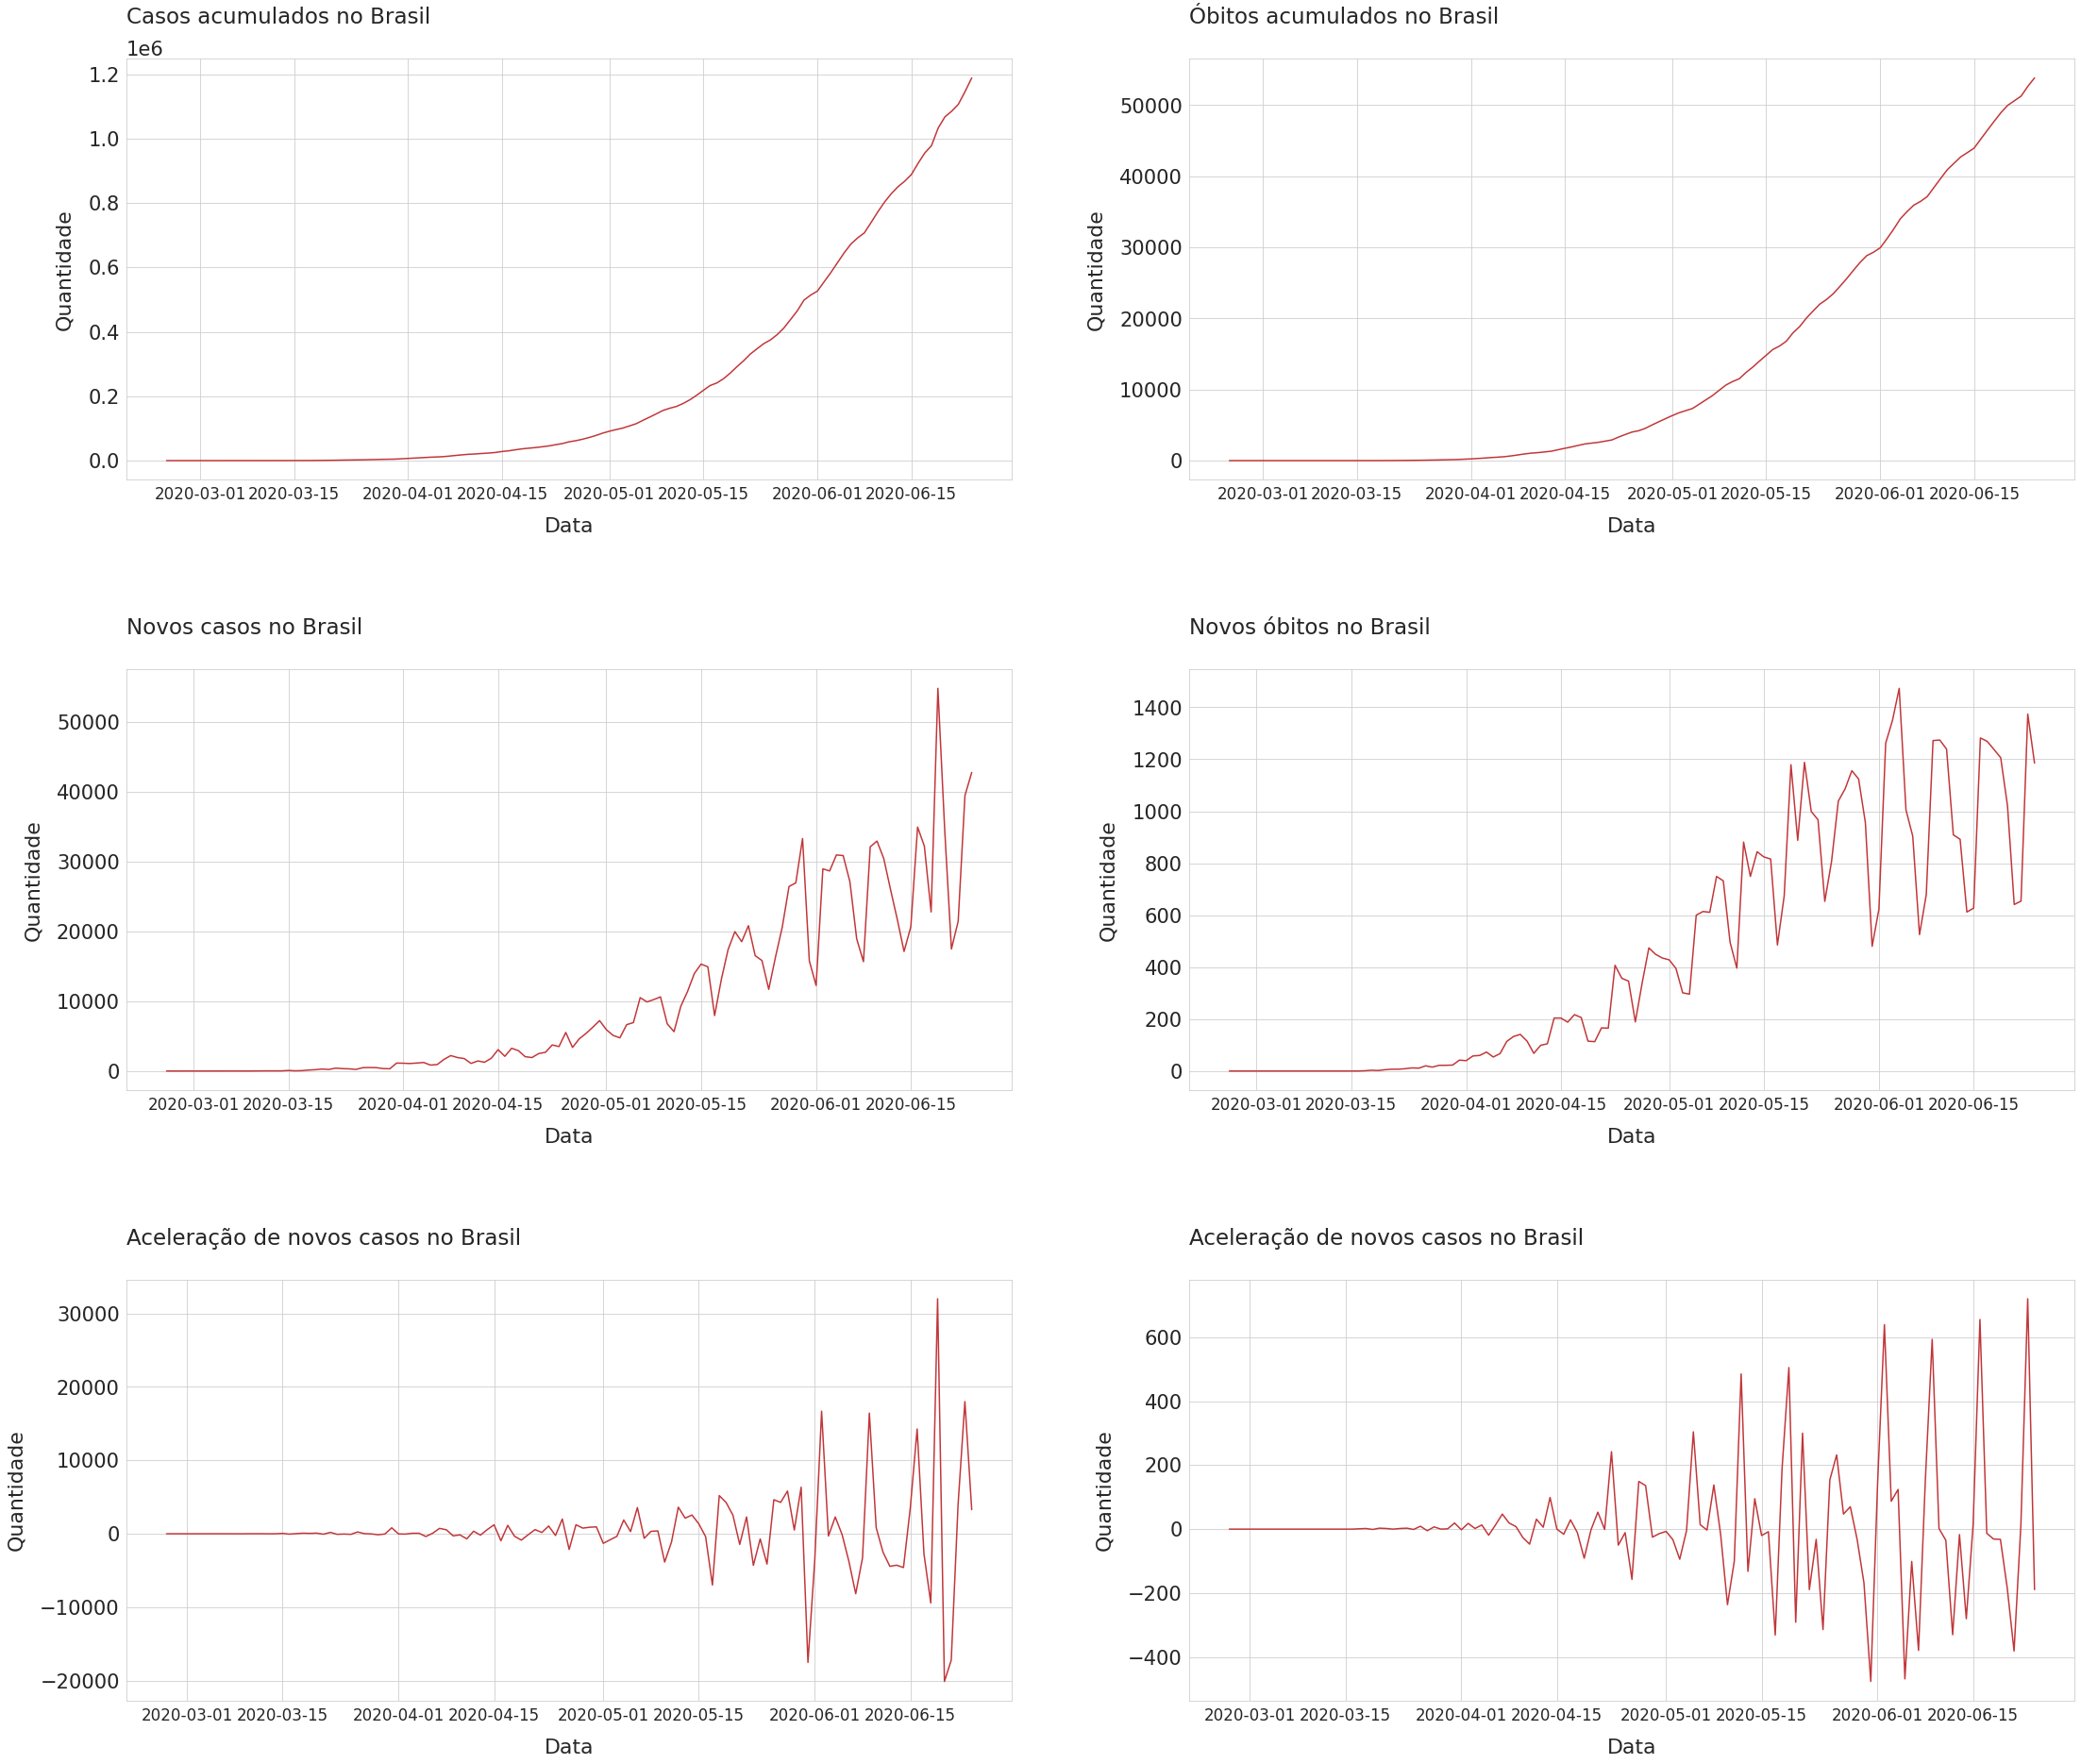

In [98]:
''' Foram criados seis gráficos, cada um a partir de uma coluna do casos_obitos_brasil. Estes gráficos são
temporais, já que é possível analisá-los conforme o tempo passa. Para isto, a coluna de índice (data) também foi
usada.'''


sns.set_palette('RdGy')
sns.set_style('whitegrid')


fig, axes = plt.subplots(nrows=3,ncols=2,figsize=(37,32))
plt.subplots_adjust(hspace=0.45)

plt.rc('xtick',labelsize=16.8)
plt.rc('ytick',labelsize=21)


print("\nTotal de casos na data {}: {}.\n".format(datetime.date(casos_obitos_brasil.index.max()),total_casos))
print("Em {} teve o maior número de novos casos: {}.\n\n".format(datetime.date(casos_obitos_brasil.loc[casos_obitos_brasil['novos_casos']==casos_obitos_brasil['novos_casos'].max()].index[0]),
                                                               casos_obitos_brasil['novos_casos'].max()))
print("Total de óbitos na data {}: {}.\n".format(datetime.date(casos_obitos_brasil.index.max()),total_obitos))
print("Em {} teve o maior número de novos óbitos: {}.\n\n\n".format(datetime.date(casos_obitos_brasil.loc[casos_obitos_brasil['novos_obitos']==casos_obitos_brasil['novos_obitos'].max()].index[0]),
                                                               casos_obitos_brasil['novos_obitos'].max()))



casos_acumulados_brasil = sns.lineplot(x=casos_obitos_brasil.index,y='casos',data=casos_obitos_brasil,ax=axes[0,0])
casos_acumulados_brasil.set_title("Casos acumulados no Brasil",fontsize=23,y=1.07,loc='left')
casos_acumulados_brasil.set_xlabel("Data",fontsize=22,labelpad=15)
casos_acumulados_brasil.set_ylabel("Quantidade",fontsize=22,labelpad=15)



novos_casos_brasil = sns.lineplot(x=casos_obitos_brasil.index,y='novos_casos',data=casos_obitos_brasil,ax=axes[1,0])
novos_casos_brasil.set_title("Novos casos no Brasil",fontsize=23,y=1.07,loc='left')
novos_casos_brasil.set_xlabel("Data",fontsize=22,labelpad=15)
novos_casos_brasil.set_ylabel("Quantidade",fontsize=22,labelpad=15)



aceleracao_novos_casos_brasil = sns.lineplot(x=casos_obitos_brasil.index,y='aceleracao_novos_casos',data=casos_obitos_brasil,ax=axes[2,0])
aceleracao_novos_casos_brasil.set_title("Aceleração de novos casos no Brasil",fontsize=23,y=1.07,loc='left')
aceleracao_novos_casos_brasil.set_xlabel("Data",fontsize=22,labelpad=15)
aceleracao_novos_casos_brasil.set_ylabel("Quantidade",fontsize=22,labelpad=15)



obitos_acumulados_brasil = sns.lineplot(x=casos_obitos_brasil.index,y='obitos',data=casos_obitos_brasil,ax=axes[0,1])
obitos_acumulados_brasil.set_title("Óbitos acumulados no Brasil",fontsize=23,y=1.07,loc='left')
obitos_acumulados_brasil.set_xlabel("Data",fontsize=22,labelpad=15)
obitos_acumulados_brasil.set_ylabel("Quantidade",fontsize=22,labelpad=15)


novos_obitos_brasil = sns.lineplot(x=casos_obitos_brasil.index,y='novos_obitos',data=casos_obitos_brasil,ax=axes[1,1])
novos_obitos_brasil.set_title("Novos óbitos no Brasil",fontsize=23,y=1.07,loc='left')
novos_obitos_brasil.set_xlabel("Data",fontsize=22,labelpad=15)
novos_obitos_brasil.set_ylabel("Quantidade",fontsize=22,labelpad=15)



aceleracao_novos_obitos_brasil = sns.lineplot(x=casos_obitos_brasil.index,y='aceleracao_novos_obitos',data=casos_obitos_brasil,ax=axes[2,1])
aceleracao_novos_obitos_brasil.set_title("Aceleração de novos casos no Brasil",fontsize=23,y=1.07,loc='left')
aceleracao_novos_obitos_brasil.set_xlabel("Data",fontsize=22,labelpad=15)
aceleracao_novos_obitos_brasil.set_ylabel("Quantidade",fontsize=22,labelpad=15)



plt.show()


#### 2.4.2 Unidades federativas

In [43]:
''' Agora, o DataFrame casos_obitos_ufs foi criado agrupando as datas e as ufs,
como também somando os números de casos e de óbitos por data e por uf.'''


casos_obitos_ufs = df_regioes_ufs.groupby(['data','uf'])[['casos','obitos']].sum()
casos_obitos_ufs

casos  obitos
data       uf                
2020-02-25 AC       0       0
           AL       0       0
           AM       0       0
           AP       0       0
           BA       0       0
...               ...     ...
2020-06-24 RS   22009     500
           SC   20921     279
           SE   20353     524
           SP  238822   13352
           TO    9098     181

[3267 rows x 2 columns]

In [44]:
''' Para a criação das quatro novas colunas, o mesmo raciocínio utilizado anteriormente foi aplicado.
Através do uso de casos_obitos_ufs.groupby(level=1), foi possível fazer as diferenças de uf para uf, 
estando elas em datas distintas.'''


casos_obitos_ufs['novos_casos'] = casos_obitos_ufs.groupby(level=1)['casos'].diff()
casos_obitos_ufs['aceleracao_novos_casos'] = casos_obitos_ufs.groupby(level=1)['novos_casos'].diff()
casos_obitos_ufs['novos_obitos'] = casos_obitos_ufs.groupby(level=1)['obitos'].diff()
casos_obitos_ufs['aceleracao_novos_obitos'] = casos_obitos_ufs.groupby(level=1)['novos_obitos'].diff()
casos_obitos_ufs

casos  obitos  ...  novos_obitos  aceleracao_novos_obitos
data       uf                  ...                                       
2020-02-25 AC       0       0  ...           NaN                      NaN
           AL       0       0  ...           NaN                      NaN
           AM       0       0  ...           NaN                      NaN
           AP       0       0  ...           NaN                      NaN
           BA       0       0  ...           NaN                      NaN
...               ...     ...  ...           ...                      ...
2020-06-24 RS   22009     500  ...          23.0                      4.0
           SC   20921     279  ...          16.0                      9.0
           SE   20353     524  ...          13.0                     -7.0
           SP  238822   13352  ...         284.0                   -150.0
           TO    9098     181  ...           2.0                      1.0

[3267 rows x 6 columns]

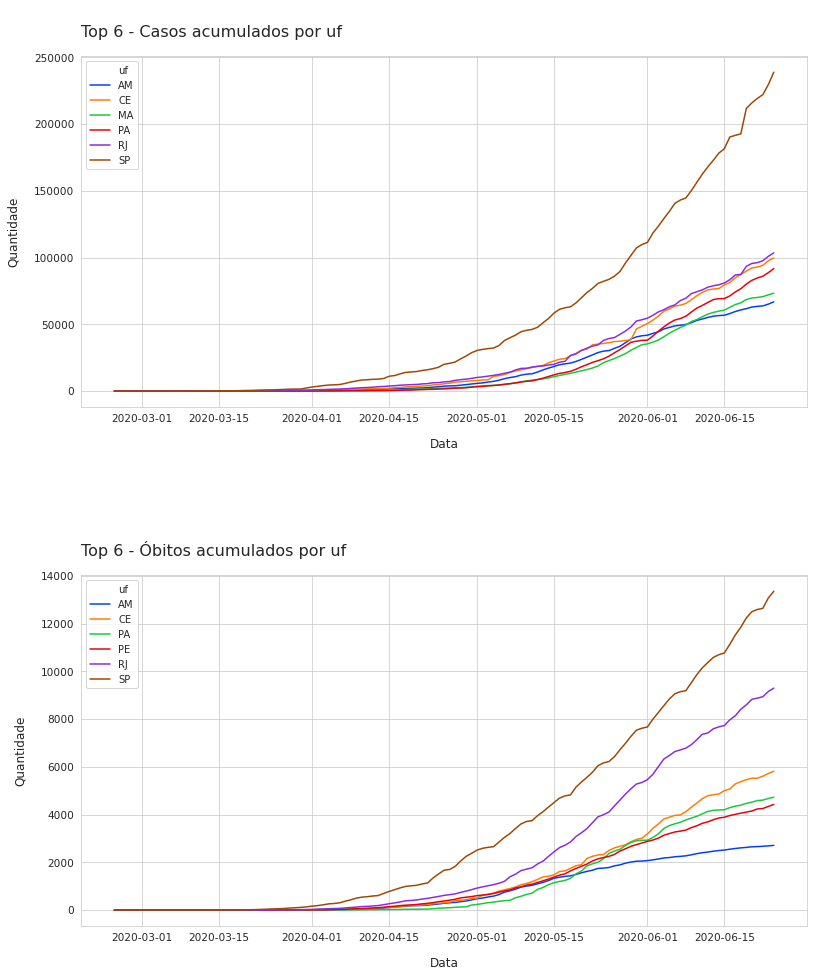

In [105]:
''' Aqui, os dois gráficos mostram a evolução tanto de casos, quanto de óbitos acumulados das seis primeiras ufs 
que possuem estes números maiores.'''


fig,axes = plt.subplots(nrows=2,ncols=1)

sns.set_style('whitegrid')

plt.subplots_adjust(hspace=0.48)

plt.rc('xtick',labelsize=10.5)
plt.rc('ytick',labelsize=10.5)

casos_acumulados_ufs_6 = sns.lineplot(x=casos_obitos_ufs.loc[(casos_obitos_ufs.index.get_level_values('uf')==ufs_casos_obitos.index[0]) | 
                                                             (casos_obitos_ufs.index.get_level_values('uf')==ufs_casos_obitos.index[1]) |
                                                             (casos_obitos_ufs.index.get_level_values('uf')==ufs_casos_obitos.index[2]) |
                                                             (casos_obitos_ufs.index.get_level_values('uf')==ufs_casos_obitos.index[3]) |
                                                             (casos_obitos_ufs.index.get_level_values('uf')==ufs_casos_obitos.index[4]) |
                                                             (casos_obitos_ufs.index.get_level_values('uf')==ufs_casos_obitos.index[5])].index.get_level_values('data'),
                                    y='casos',
                                    hue=casos_obitos_ufs.loc[(casos_obitos_ufs.index.get_level_values('uf')==ufs_casos_obitos.index[0]) | 
                                                             (casos_obitos_ufs.index.get_level_values('uf')==ufs_casos_obitos.index[1]) |
                                                             (casos_obitos_ufs.index.get_level_values('uf')==ufs_casos_obitos.index[2]) |
                                                             (casos_obitos_ufs.index.get_level_values('uf')==ufs_casos_obitos.index[3]) |
                                                             (casos_obitos_ufs.index.get_level_values('uf')==ufs_casos_obitos.index[4]) |
                                                             (casos_obitos_ufs.index.get_level_values('uf')==ufs_casos_obitos.index[5])].index.get_level_values('uf'),
                                   data=casos_obitos_ufs.loc[(casos_obitos_ufs.index.get_level_values('uf')==ufs_casos_obitos.index[0]) | 
                                                             (casos_obitos_ufs.index.get_level_values('uf')==ufs_casos_obitos.index[1]) |
                                                             (casos_obitos_ufs.index.get_level_values('uf')==ufs_casos_obitos.index[2]) |
                                                             (casos_obitos_ufs.index.get_level_values('uf')==ufs_casos_obitos.index[3]) |
                                                             (casos_obitos_ufs.index.get_level_values('uf')==ufs_casos_obitos.index[4]) |
                                                             (casos_obitos_ufs.index.get_level_values('uf')==ufs_casos_obitos.index[5])],
                                  palette='bright',
                                  ax=axes[0]
                                  )

casos_acumulados_ufs_6.figure.set_size_inches(13,16)
casos_acumulados_ufs_6.set_title("\nTop 6 - Casos acumulados por uf",fontsize=16,y=1.04,loc='left')
casos_acumulados_ufs_6.set_xlabel("Data",fontsize=12,labelpad=13.8)
casos_acumulados_ufs_6.set_ylabel("Quantidade",fontsize=12,labelpad=13.8)


obitos_acumulados_ufs_6 = sns.lineplot(x=casos_obitos_ufs.loc[(casos_obitos_ufs.index.get_level_values('uf')==ufs_casos_obitos.loc[ufs_casos_obitos['obitos']==numero_obitos[0]].index[0])| 
                                                              (casos_obitos_ufs.index.get_level_values('uf')==ufs_casos_obitos.loc[ufs_casos_obitos['obitos']==numero_obitos[1]].index[0])|
                                                              (casos_obitos_ufs.index.get_level_values('uf')==ufs_casos_obitos.loc[ufs_casos_obitos['obitos']==numero_obitos[2]].index[0])|
                                                              (casos_obitos_ufs.index.get_level_values('uf')==ufs_casos_obitos.loc[ufs_casos_obitos['obitos']==numero_obitos[3]].index[0])|
                                                              (casos_obitos_ufs.index.get_level_values('uf')==ufs_casos_obitos.loc[ufs_casos_obitos['obitos']==numero_obitos[4]].index[0])|
                                                              (casos_obitos_ufs.index.get_level_values('uf')==ufs_casos_obitos.loc[ufs_casos_obitos['obitos']==numero_obitos[5]].index[0])].index.get_level_values('data'),
                                  y='obitos',
                                  hue=casos_obitos_ufs.loc[(casos_obitos_ufs.index.get_level_values('uf')==ufs_casos_obitos.loc[ufs_casos_obitos['obitos']==numero_obitos[0]].index[0])| 
                                                           (casos_obitos_ufs.index.get_level_values('uf')==ufs_casos_obitos.loc[ufs_casos_obitos['obitos']==numero_obitos[1]].index[0])|
                                                           (casos_obitos_ufs.index.get_level_values('uf')==ufs_casos_obitos.loc[ufs_casos_obitos['obitos']==numero_obitos[2]].index[0])|
                                                           (casos_obitos_ufs.index.get_level_values('uf')==ufs_casos_obitos.loc[ufs_casos_obitos['obitos']==numero_obitos[3]].index[0])|
                                                           (casos_obitos_ufs.index.get_level_values('uf')==ufs_casos_obitos.loc[ufs_casos_obitos['obitos']==numero_obitos[4]].index[0])|
                                                           (casos_obitos_ufs.index.get_level_values('uf')==ufs_casos_obitos.loc[ufs_casos_obitos['obitos']==numero_obitos[5]].index[0])].index.get_level_values('uf'),
                                 data=casos_obitos_ufs.loc[(casos_obitos_ufs.index.get_level_values('uf')==ufs_casos_obitos.loc[ufs_casos_obitos['obitos']==numero_obitos[0]].index[0])| 
                                                           (casos_obitos_ufs.index.get_level_values('uf')==ufs_casos_obitos.loc[ufs_casos_obitos['obitos']==numero_obitos[1]].index[0])|
                                                           (casos_obitos_ufs.index.get_level_values('uf')==ufs_casos_obitos.loc[ufs_casos_obitos['obitos']==numero_obitos[2]].index[0])|
                                                           (casos_obitos_ufs.index.get_level_values('uf')==ufs_casos_obitos.loc[ufs_casos_obitos['obitos']==numero_obitos[3]].index[0])|
                                                           (casos_obitos_ufs.index.get_level_values('uf')==ufs_casos_obitos.loc[ufs_casos_obitos['obitos']==numero_obitos[4]].index[0])|
                                                           (casos_obitos_ufs.index.get_level_values('uf')==ufs_casos_obitos.loc[ufs_casos_obitos['obitos']==numero_obitos[5]].index[0])],
                                palette='bright',
                                ax=axes[1]
                                )

obitos_acumulados_ufs_6.figure.set_size_inches(13,16)
obitos_acumulados_ufs_6.set_title("Top 6 - Óbitos acumulados por uf",fontsize=16,y=1.04,loc='left')
obitos_acumulados_ufs_6.set_xlabel("Data",fontsize=12,labelpad=13.8)
obitos_acumulados_ufs_6.set_ylabel("Quantidade",fontsize=12,labelpad=13.8)



plt.show()

In [115]:
''' Por meio da função curvas_ufs, é possível obter os seis gráficos temporais de cada coluna do casos_obitos_ufs,
para cada unidade federativa. Assim, basta apenas inserir a uf desejada a fim obtê-los.''' 


def curvas_ufs(uf):


  fig,axes = plt.subplots(nrows=3,ncols=2,figsize=(35,28))
  plt.subplots_adjust(hspace=0.45)
  
  plt.rc('xtick',labelsize=16)
  plt.rc('ytick',labelsize=21)


  sns.set_style('whitegrid')



  casos_acumulados_ufs = sns.lineplot(x=casos_obitos_ufs.loc[casos_obitos_ufs.index.get_level_values('uf')==uf].index.get_level_values('data'),
                                      y='casos',
                                      data=casos_obitos_ufs.loc[casos_obitos_ufs.index.get_level_values('uf')==uf],
                                      ax=axes[0,0])
  casos_acumulados_ufs.set_title("Casos acumulados de Covid-19 em {}".format(uf),fontsize=23,y=1.06,loc='left')
  casos_acumulados_ufs.set_xlabel("Data",fontsize=22,labelpad=13)
  casos_acumulados_ufs.set_ylabel("Quantidade",fontsize=22,labelpad=13)


  obitos_acumulados_ufs = sns.lineplot(x=casos_obitos_ufs.loc[casos_obitos_ufs.index.get_level_values('uf')==uf].index.get_level_values('data'),
                                      y='obitos',
                                      data=casos_obitos_ufs.loc[casos_obitos_ufs.index.get_level_values('uf')==uf],
                                      ax=axes[0,1])
  obitos_acumulados_ufs.set_title("Óbitos acumulados de Covid-19 em {}".format(uf),fontsize=23,y=1.06,loc='left')
  obitos_acumulados_ufs.set_xlabel("Data",fontsize=22,labelpad=13)
  obitos_acumulados_ufs.set_ylabel("Quantidade",fontsize=22,labelpad=13)


  novos_casos_ufs = sns.lineplot(x=casos_obitos_ufs.loc[casos_obitos_ufs.index.get_level_values('uf')==uf].index.get_level_values('data'),
                                      y='novos_casos',
                                      data=casos_obitos_ufs.loc[casos_obitos_ufs.index.get_level_values('uf')==uf],
                                      ax=axes[1,0])
  novos_casos_ufs.set_title("Novos casos de Covid-19 em {}".format(uf),fontsize=23,y=1.06,loc='left')
  novos_casos_ufs.set_xlabel("Data",fontsize=22,labelpad=13)
  novos_casos_ufs.set_ylabel("Quantidade",fontsize=22,labelpad=13)


  novos_obitos_ufs = sns.lineplot(x=casos_obitos_ufs.loc[casos_obitos_ufs.index.get_level_values('uf')==uf].index.get_level_values('data'),
                                      y='novos_obitos',
                                      data=casos_obitos_ufs.loc[casos_obitos_ufs.index.get_level_values('uf')==uf],
                                      ax=axes[1,1])
  novos_obitos_ufs.set_title("Novos óbitos de Covid-19 em {}".format(uf),fontsize=23,y=1.06,loc='left')
  novos_obitos_ufs.set_xlabel("Data",fontsize=22,labelpad=13)
  novos_obitos_ufs.set_ylabel("Quantidade",fontsize=22,labelpad=13)


  aceleracao_novos_casos_ufs = sns.lineplot(x=casos_obitos_ufs.loc[casos_obitos_ufs.index.get_level_values('uf')==uf].index.get_level_values('data'),
                                      y='aceleracao_novos_casos',
                                      data=casos_obitos_ufs.loc[casos_obitos_ufs.index.get_level_values('uf')==uf],
                                      ax=axes[2,0])
  aceleracao_novos_casos_ufs.set_title("Aceleração de novos casos de Covid-19 em {}".format(uf),fontsize=23,y=1.06,loc='left')
  aceleracao_novos_casos_ufs.set_xlabel("Data",fontsize=22,labelpad=13)
  aceleracao_novos_casos_ufs.set_ylabel("Quantidade",fontsize=22,labelpad=13)


  aceleracao_novos_obitos_ufs = sns.lineplot(x=casos_obitos_ufs.loc[casos_obitos_ufs.index.get_level_values('uf')==uf].index.get_level_values('data'),
                                      y='aceleracao_novos_obitos',
                                      data=casos_obitos_ufs.loc[casos_obitos_ufs.index.get_level_values('uf')==uf],
                                      ax=axes[2,1])
  aceleracao_novos_obitos_ufs.set_title("Aceleração de novos óbitos de Covid-19 em {}".format(uf),fontsize=23,y=1.06,loc='left')
  aceleracao_novos_obitos_ufs.set_xlabel("Data",fontsize=22,labelpad=13)
  aceleracao_novos_obitos_ufs.set_ylabel("Quantidade",fontsize=22,labelpad=13)
  
  
  plt.show()


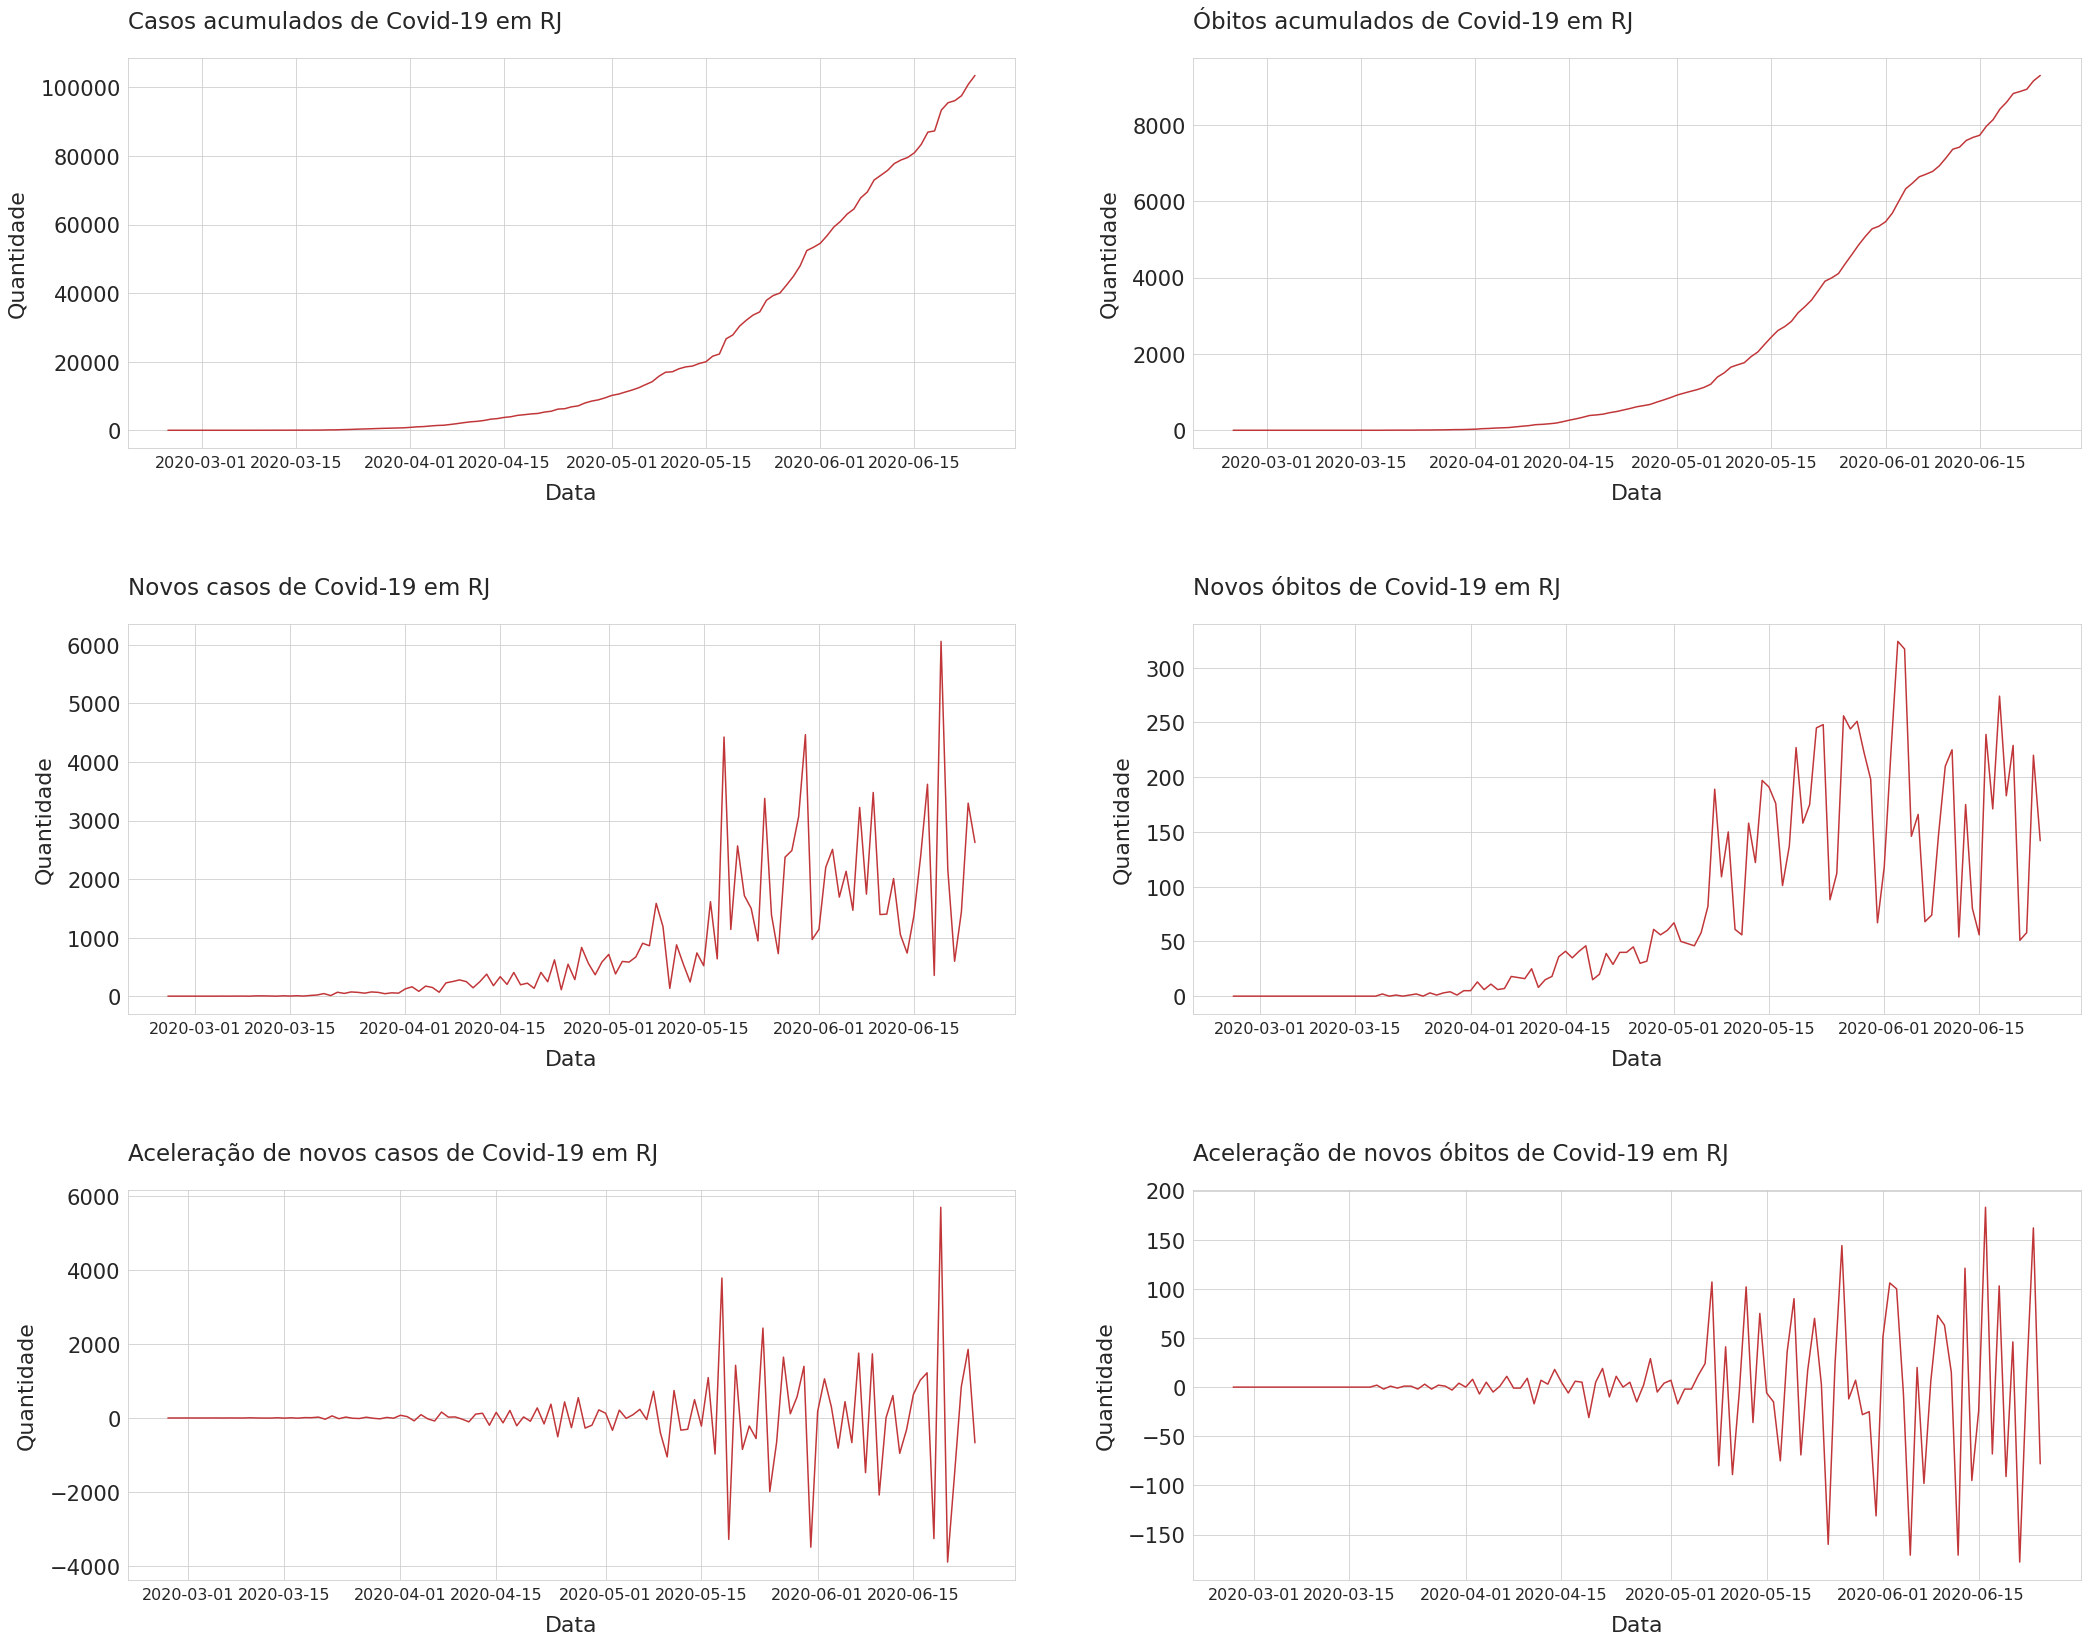

In [116]:
# Um exemplo com a uf RJ.

curvas_ufs("RJ")